In [69]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
%matplotlib inline

In [70]:
#let's create synthetic data points
from sklearn.datasets import make_classification


In [71]:
X,Y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)
X

array([[ 1.07542147, -1.00357874],
       [-1.78537523, -0.66482773],
       [-0.03213152, -1.2758372 ],
       ...,
       [ 1.11129038,  0.47699493],
       [-1.79134455, -1.10915246],
       [ 0.45096357, -0.36828302]])

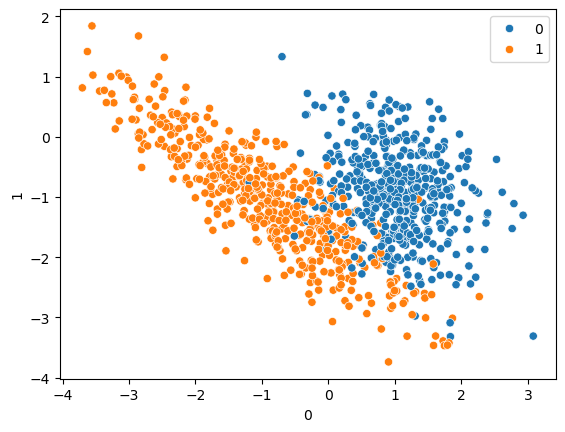

In [72]:
#X has two columns X1 and X2
df=pd.DataFrame(X)
sns.scatterplot(x=df[0],y=df[1],hue=Y)
plt.show()

In [73]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=10)

In [75]:
svc.fit(X_train,Y_train)

SVC(kernel='linear')

In [76]:
#Prediction
Y_pred=svc.predict(X_test)

In [77]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))


              precision    recall  f1-score   support

           0       0.97      0.91      0.94       133
           1       0.90      0.97      0.93       117

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

[[121  12]
 [  4 113]]


In [78]:
rbf=SVC(kernel='rbf')

In [79]:
rbf.fit(X_train,Y_train)

SVC()

In [80]:
#Prediction
Y_pred_rbf=rbf.predict(X_test)

In [81]:
print(classification_report(Y_test,Y_pred_rbf))
print(confusion_matrix(Y_test,Y_pred_rbf))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       133
           1       0.93      0.97      0.95       117

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

[[124   9]
 [  4 113]]


In [82]:
from sklearn.model_selection import GridSearchCV

#defining parameter range
param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf']}

In [85]:
grid=GridSearchCV(SVC(),param_grid=param_grid,cv=5,verbose=3,refit=True)

In [86]:
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.913 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [87]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [89]:
#Prediction
Y_pred_g=rbf.predict(X_test)
print(classification_report(Y_test,Y_pred_g))
print(confusion_matrix(Y_test,Y_pred_g))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       133
           1       0.93      0.97      0.95       117

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

[[124   9]
 [  4 113]]
